In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

In [2]:
weather = pd.read_csv('../datasets/weather.csv')
train = pd.read_csv('../datasets/train.csv')

## Weather Dataset

It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. Provided is the dataset from NOAA of the weather conditions of 2007 to 2014, during the months of the tests. 

**Location of Weather Stations**  
Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level

Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

![alt text](Chicago-Weather.png "Title")


### How does weather affect the west nile virus?

Weather factors are important drivers of WNV transmission due to their direct effect in mosquito biology.

* According to [study drivers of West Nile virus human illness in the Chicago](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0227160)
    * higher than normal average annual temperatures are associated with an increased likelihood of higher WNV disease incidence
    * higher than normal precipitation was positively associated with higher human WNV cases in the eastern region of the United States, but this relationship was reversed for the western region
    * Another study identified drought as an important driver of WNV epidemics in the United States
    * hot weather conditions, warm winters, and higher MIR in earlier weeks increased the probability of an area of having a WNV human case.

### Weather Data Dictionary
Features were categorized according to the variable they're measuring

|Feature|Category|Type|Description|  
|:--|:-:|:-:|:--|  
|Station|Station|int64|Station Type|  
|Date|Date|object|Date of data collection|  
|Tmax|Temperature|int64|Maximum Temperature|  
|Tmin|Temperature|int64|Minimum Temperature|
|Tavg|Temperature|object|Average Temperature|
|Depart|Temperature|int64|Departure from Normal Temperature|
|Dewpoint|Temperature|int64|The temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity (RH) of 100%|
|WetBulb|Temperature|object|lowest temperature to which air can be cooled by the evaporation of water into the air at a constant pressure|
|Heat|Degree Days|object|Heating (Season begins with July)|
|Cool|Degree Days|object|Cooling (Season begins with January)|
|Sunrise|Degree Days|object|Calculated, not observed|
|Sunset|Degree Days|object|Calculated, not observed|
|CodeSum|Degree Days|object|Weather Phenomena|
|Depth|Snow/Ice|object|Snow on ground (Inches)|
|Water1|Snow/Ice|object|Water on ground (Inches)|
|Snowfall|Precipitation|object|Snowfall (Inches)|
|PrecipTotal|Precipitation|object|Water equivalent (Inches)|
|StnPressure|Pressure|object|Average Station Pressure|
|SeaLevel|Pressure|object|Average Sea Level Pressure|
|ResultSpeed|Wind|float64|Resultant Wind Speed|
|ResultDir|Wind|int64|Resultant Wind Direction|
|AvgSpeed|Wind|object|Average Wind Speed|

In [3]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [5]:
weather['year'] = pd.to_datetime(weather['Date']).dt.year
weather['month'] = pd.to_datetime(weather['Date']).dt.month

In [6]:
weather.shape

(2944, 24)

## Merge Train and Weather datasets

### Assigning stations to train data points

Before we merge the two datasets, we have decided to assign weather data based on the trap's proximity to the nearest weather station. This should provide us with a more accurate representation of the weather condtions for each trap.

In [7]:
def closest_station(latitude, longitude):
    '''Function to deteremine which weather station's data to use based on station proximity to trap'''
                    
    station_1_coord = (41.995, -87.933)
    station_2_coord = (41.786, -87.752)
    entry_coord = (latitude, longitude)
    
    if geodesic(entry_coord, station_1_coord) < geodesic(entry_coord, station_2_coord):
        return 1
    else:
        return 2

In [8]:
train['Station'] = train.apply(lambda x: closest_station(x['Latitude'], x['Longitude']), axis=1)

In [9]:
train.shape

(10506, 13)

### Merge Train and Weather

We have decided to merge the train and weather data sets on the 'Date' and 'Station' fields.

In [10]:
train_weather = train.merge(weather, how="left", on=["Station", "Date"])

In [63]:
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
 12  Station                 10506 non-null  int64  
 13  Tmax                    10506 non-null  int64  
 14  Tmin                    10506 non-null

## Missing Values

### 'T' values in SnowFall and Precipitation

**Observations** 

There are 12 'trace' records in 'SnowFall' and 318 'trace' records in 'PrecipTotal'. We will replace them with 0 since these represent negligible amount of precipitation.

In [12]:
#identify which columns have 'T' values in them

missing_t = []
for coln in weather.columns:
    if weather.loc[weather[coln]=='  T', coln].count() >0:
        missing_t.append({coln: weather.loc[weather[coln]=='  T', coln].count()})
    
missing_t

[{'SnowFall': 12}, {'PrecipTotal': 318}]

In [13]:
#Replace 'T' to 0 since these are negligible amount of percipitation

weather['SnowFall'].replace('  T', 0, inplace=True)
weather['PrecipTotal'].replace('  T', 0, inplace=True)

### 'M' values in 12 columns

**Observations**

'M' values represent missing data and they are present in 12 features. Below is a breakdown of the missing data in each column, segmented by station. Most of the missing data are in Station 2. We will be evaluating each feature separately to determine the best approach to impute these missing data.

In [14]:
#identify which columns have 'M' values in them

missing_m = []
for coln in weather.columns:
    if weather.loc[weather[coln]=='M', coln].count() >0:
        missing_m.append(coln)


In [15]:
#Missing values by station (# denotes station)

check = []

for coln_check in missing_m:
    entry = weather.loc[weather[coln_check]=='M',['Station',coln_check]].groupby('Station').count()
    check.append(entry.to_dict('index'))
    
check

[{2: {'Tavg': 11}},
 {2: {'Depart': 1472}},
 {1: {'WetBulb': 3}, 2: {'WetBulb': 1}},
 {2: {'Heat': 11}},
 {2: {'Cool': 11}},
 {2: {'Depth': 1472}},
 {1: {'Water1': 1472}, 2: {'Water1': 1472}},
 {2: {'SnowFall': 1472}},
 {2: {'PrecipTotal': 2}},
 {1: {'StnPressure': 2}, 2: {'StnPressure': 2}},
 {1: {'SeaLevel': 5}, 2: {'SeaLevel': 4}},
 {2: {'AvgSpeed': 3}}]

#### Missing Tavg

We will replace the missing 'Tavg' data with the average of the Tmin and Tmax of that day.

In [16]:
#Suggestions to replace missing Tavg with average of Tmin and Tmax 

def missing_Tavg(row):
    if row['Tavg'] == 'M':
        row['Tavg'] = (row['Tmax'] + row['Tmin']) / 2
    return row['Tavg']

In [17]:
weather['Tavg'] = weather.apply(missing_Tavg, axis=1)
weather['Tavg'] = weather['Tavg'].astype(int)

#### Missing WetBulb / Heat / Cool / PrecipTotal / SeaLevel / AvgSpeed

**Observations**

For those features with <11 missing data points, they only represent a small number of the overall dataset (1472, <1%). Hence, we imputed them based on the corresponding record in the other station on the same day. From our EDA described below, we recognised that the data from these two stations are broadly in line since they are not far apart.

**Missing WetBulb**

In [18]:
#Replace missing wetbulb temp with corresponding wetbulb temp in other station

def missing_wetbulb(row):
    if row['WetBulb'] == 'M':
        if row['Station'] == 1:
            row['WetBulb'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==2)),'WetBulb'].values[0]
        elif row['Station'] == 2:
            row['WetBulb'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==1)),'WetBulb'].values[0]
            
    return row['WetBulb']

In [19]:
weather['WetBulb'] = weather.apply(missing_wetbulb, axis=1)
weather['WetBulb'] = weather['WetBulb'].astype(int)

**Missing Heat and Cool**

In [20]:
#Replace missing Heat and Cool with corresponding data in other station

def missing_heat(row):
    if row['Heat'] == 'M':
        if row['Station'] == 1:
            row['Heat'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==2)),'Heat'].values[0]
        elif row['Station'] == 2:
            row['Heat'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==1)),'Heat'].values[0]
            
    return row['Heat']


In [21]:
weather['Heat'] = weather.apply(missing_heat, axis=1)
weather['Heat'] = weather['Heat'].astype(int)

In [22]:
def missing_cool(row):
    if row['Cool'] == 'M':
        if row['Station'] == 1:
            row['Cool'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==2)),'Cool'].values[0]
        elif row['Station'] == 2:
            row['Cool'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==1)),'Cool'].values[0]
            
    return row['Cool']


In [23]:
weather['Cool'] = weather.apply(missing_cool, axis=1)
weather['Cool'] = weather['Cool'].astype(int)

**Missing PrecipTotal**

In [24]:
#Replace missing PrecipTotal with corresponding data in other station

def missing_PrecipTotal(row):
    if row['PrecipTotal'] == 'M':
        if row['Station'] == 1:
            row['PrecipTotal'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==2)),'PrecipTotal'].values[0]
        elif row['Station'] == 2:
            row['PrecipTotal'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==1)),'PrecipTotal'].values[0]
            
    return row['PrecipTotal']

In [25]:
weather['PrecipTotal'] = weather.apply(missing_PrecipTotal, axis=1)
weather['PrecipTotal'] = weather['PrecipTotal'].astype(float)

**Missing SeaLevel**

In [26]:
#Replace missing SeaLevel with corresponding data in other station

def missing_SeaLevel(row):
    if row['SeaLevel'] == 'M':
        if row['Station'] == 1:
            row['SeaLevel'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==2)),'SeaLevel'].values[0]
        elif row['Station'] == 2:
            row['SeaLevel'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==1)),'SeaLevel'].values[0]
            
    return row['SeaLevel']

In [27]:
weather['SeaLevel'] = weather.apply(missing_SeaLevel, axis=1)
weather['SeaLevel'] = weather['SeaLevel'].astype(float)

**Missing AvgSpeed**

In [28]:
#Replace missing AvgSpeed with corresponding data in other station

def missing_AvgSpeed(row):
    if row['AvgSpeed'] == 'M':
        if row['Station'] == 1:
            row['AvgSpeed'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==2)),'AvgSpeed'].values[0]
        elif row['Station'] == 2:
            row['AvgSpeed'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==1)),'AvgSpeed'].values[0]
            
    return row['AvgSpeed']

In [29]:
weather['AvgSpeed'] = weather.apply(missing_AvgSpeed, axis=1)
weather['AvgSpeed'] = weather['AvgSpeed'].astype(float)

#### Missing StnPressure

For 'StnPressure', there are missing values in both stations on 10/08/2013. As such, our previous method of using the record in the other station to impute will not work (we will still use them for the first two missing values). As a workaround, we have assumed that the day's 'StnPressure' should be in line with the mean 'StnPressure' of that particular month (i.e. Aug 2013), and have imputed the missing record in both stations with this mean 'StnPressure'.

In [30]:
weather.loc[weather['StnPressure']=='M',:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,year,month
87,2,2007-06-13,86,68,77,M,53,62,0,12,...,M,M,0.0,M,30.09,7.0,5,8.6,2007,6
848,1,2009-06-26,86,69,78,7,60,67,0,13,...,M,0.0,0.0,M,29.85,6.4,4,8.2,2009,6
2410,1,2013-08-10,81,64,73,0,57,63,0,8,...,M,0.0,0.0,M,30.08,5.3,5,6.5,2013,8
2411,2,2013-08-10,81,68,75,M,55,63,0,10,...,M,M,0.0,M,30.07,6.0,6,7.4,2013,8


In [31]:
#Replace first two rows of missing StnPressure with corresponding data in other station

def missing_StnPressure(row):
    if row['StnPressure'] == 'M':
        if row['Station'] == 1:
            row['StnPressure'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==2)),'StnPressure'].values[0]
        elif row['Station'] == 2:
            row['StnPressure'] = weather.loc[((weather['Date']==row['Date'])&(weather['Station']==1)),'StnPressure'].values[0]
            
    return row['StnPressure']

In [32]:
weather['StnPressure'] = weather.apply(missing_StnPressure, axis=1)

In [33]:
#Use mean Aug 2013 StnPressure to impute remaining two missing values

aug_stnpressure = weather.loc[(weather['month']==8) & (weather['year']==2013) & (weather['StnPressure'] != 'M'),'StnPressure']
aug_stnpressure = aug_stnpressure.astype(float)
aug_stnpressure_mean = np.round(aug_stnpressure.mean(),2)

In [34]:
weather['StnPressure'].replace('M',aug_stnpressure_mean, inplace=True)
weather['StnPressure'] = weather['StnPressure'].astype(float)

We are left with 4 columns with missing 'M' values ('Depart', 'Depth', 'Water1', 'SnowFall') now. Since they are missing a whole chunk of data (1472 missing per column), we will most likely drop them - our EDA section below will explore this further.

## EDA - Weather Features

### EDA on Temperature

#### Temperature Variables

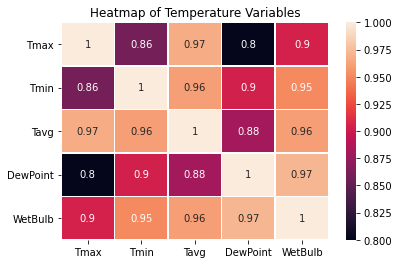

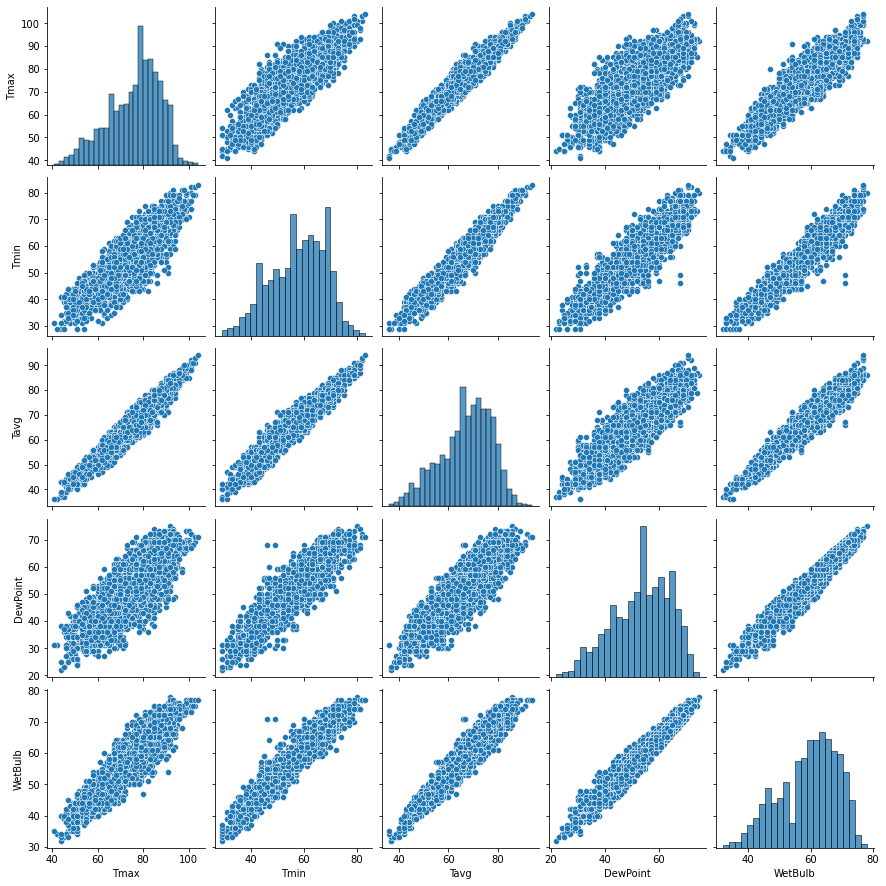

In [35]:
# Plot heatmap to compare temperature variables
ax1 = plt.axes()
sns.heatmap(
    weather[['Tmax','Tmin','Tavg','DewPoint','WetBulb']].corr(),
    annot=True,
    linewidth=0.5,
    vmax=1,
    vmin=0.8,
    ax=ax1
)
ax1.set_title('Heatmap of Temperature Variables')

# Plot pairplot to compare temperature variables
sns.pairplot(weather[['Tmax','Tmin','Tavg','DewPoint','WetBulb']]);


**Observations**

Correlation between DewPoint and WetBulb is almost perfect at 0.97.
By definition, both is a measure of humidity, but the difference between the two is:
 * DewPoint is the temperature to which we should cool the air to saturate the air with water vapour
 * WetBulb is the temperature that we can get from a moistened thermometer bulb that is exposed to air flow

Thus we will use DewPoint as a measure of humidity and drop WetBulb

In [36]:
# Drop WetBulb
weather.drop('WetBulb',axis=1, inplace=True)

In [37]:
# Drop Depart
weather.drop('Depart',axis=1, inplace=True)

#### Sunrise/Sunset and Heat/Cool

In [38]:
# Locate rows with sunset & sunrise missing
weather.loc[(weather['Sunset']=='-') | (weather['Sunrise']=='-')]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,Heat,Cool,Sunrise,Sunset,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,year,month
1,2,2007-05-01,84,52,68,51,0,3,-,-,...,M,M,0.00,29.18,29.82,2.7,25,9.6,2007,5
3,2,2007-05-02,60,43,52,42,13,0,-,-,...,M,M,0.00,29.44,30.08,13.3,2,13.4,2007,5
5,2,2007-05-03,67,48,58,40,7,0,-,-,...,M,M,0.00,29.46,30.12,12.9,6,13.2,2007,5
7,2,2007-05-04,78,51,64,42,7,0,-,-,...,M,M,0.00,29.36,30.04,10.1,7,10.4,2007,5
9,2,2007-05-05,66,54,60,39,5,0,-,-,...,M,M,0.00,29.46,30.09,11.2,7,11.5,2007,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79,54,67,52,0,2,-,-,...,M,M,0.02,29.00,29.67,12.7,19,13.6,2014,10
2937,2,2014-10-28,66,48,57,40,8,0,-,-,...,M,M,0.03,29.23,29.85,14.0,26,14.6,2014,10
2939,2,2014-10-29,49,40,45,34,20,0,-,-,...,M,M,0.00,29.42,30.07,8.5,29,9.0,2014,10
2941,2,2014-10-30,53,37,45,35,20,0,-,-,...,M,M,0.00,29.41,30.10,5.9,23,6.5,2014,10


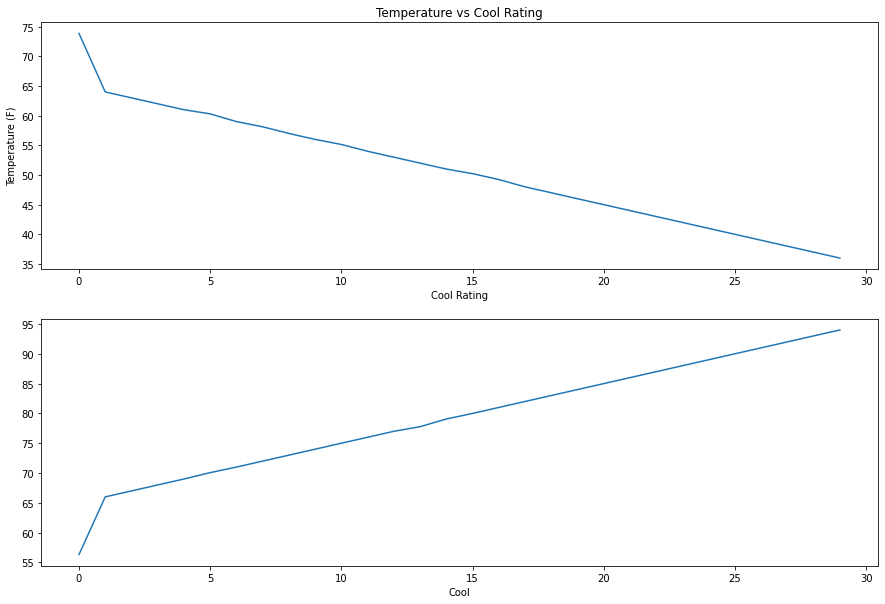

In [39]:
# Create subplot for 2 graphs
fig, axes = plt.subplots(nrows=2, figsize=(15,10))

# Plot 2 graphs to represent temperature vs cool/heat
weather.groupby('Heat')['Tavg'].mean().sort_values().plot(kind='line',ax=axes[0])
axes[0].set_title('Temperature vs Heat Rating',)
axes[0].set_xlabel('Heat Rating')
axes[0].set_ylabel('Temperature (F)')

weather.groupby('Cool')['Tavg'].mean().sort_values().plot(kind='line',ax=axes[1])
axes[0].set_title('Temperature vs Cool Rating',)
axes[0].set_xlabel('Cool Rating')
axes[0].set_ylabel('Temperature (F)');

**Observations**

Based on our grouping, the higher the temperature, the more heat is required, vice-versa

* Heat and Cool  are variables more relevant for calculating energy needs for electrical, natural gas, power, and heating, and air conditioning industries,  not as relevant to risk of mosquito breeding
* Sunrise and Sunset (Timings of sunrise and sunset unlikely affect mosquito breeding)

We will drop these values

In [40]:
weather.drop(columns=['Heat','Cool','Sunset','Sunrise'], axis=1, inplace=True)

### EDA on Code Sum

In [41]:
weather['CodeSum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

**Observations**  

As per the above, there are many dfferent codes representing different conditions. We have decided to classify these conditions based on 4 broad categories and will use these codes to represent weather conditions present:
* Rain = TS / RA / DZ / SH 
* Snow = GR / SN / SG / GS / PL / IC
* Mist = FG / BR / UP 
* Dust = HZ / FU / VA / DU / DS / PO / SA / SS / PY / SQ / DR / BL

In [42]:
# Create features to represent weather
weather['Rain'] = weather.apply(lambda x: 1 if x['CodeSum'] in ('|'.join(['TS', 'RA', 'DZ', 'SH'])) else 0, axis=1)
weather['Snow'] = weather.apply(lambda x: 1 if x['CodeSum'] in ('|'.join(['GR', 'SN', 'SG', 'GS', 'PL','IC'])) else 0, axis=1)
weather['Mist'] = weather.apply(lambda x: 1 if x['CodeSum'] in ('|'.join(['FG','BR','UP'])) else 0, axis=1)
weather['Dust'] = weather.apply(lambda x: 1 if x['CodeSum'] in ('|'.join(['HZ','FU', 'VA', 'DU', 'DS','PO','SA','SS','PY','SQ','DR','BL'])) else 0, axis=1)
weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,CodeSum,Depth,Water1,SnowFall,...,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,year,month,Rain,Snow,Mist,Dust
0,1,2007-05-01,83,50,67,51,,0,M,0.0,...,29.82,1.7,27,9.2,2007,5,0,0,0,0
1,2,2007-05-01,84,52,68,51,,M,M,M,...,29.82,2.7,25,9.6,2007,5,0,0,0,0
2,1,2007-05-02,59,42,51,42,BR,0,M,0.0,...,30.09,13.0,4,13.4,2007,5,0,0,1,0
3,2,2007-05-02,60,43,52,42,BR HZ,M,M,M,...,30.08,13.3,2,13.4,2007,5,0,0,0,0
4,1,2007-05-03,66,46,56,40,,0,M,0.0,...,30.12,11.7,7,11.9,2007,5,0,0,0,0
5,2,2007-05-03,67,48,58,40,HZ,M,M,M,...,30.12,12.9,6,13.2,2007,5,0,0,0,1
6,1,2007-05-04,66,49,58,41,RA,0,M,0.0,...,30.05,10.4,8,10.8,2007,5,1,0,0,0
7,2,2007-05-04,78,51,64,42,,M,M,M,...,30.04,10.1,7,10.4,2007,5,0,0,0,0
8,1,2007-05-05,66,53,60,38,,0,M,0.0,...,30.10,11.7,7,12.0,2007,5,0,0,0,0
9,2,2007-05-05,66,54,60,39,,M,M,M,...,30.09,11.2,7,11.5,2007,5,0,0,0,0


In [43]:
# Drop CodeSum
weather.drop(columns='CodeSum',axis=1,inplace=True)

### EDA on Snow/Ice

**Observations**

Both 'Depth' and 'Water1' relate to Snow/Ice conditions. Since the weather data spans the summer months of Chicago, it is not surprising that all the data are zero/missing across these two features. We will drop both features.

In [44]:
print(weather['Depth'].unique())
print(weather['Water1'].unique())

['0' 'M']
['M']


In [45]:
weather.drop(columns=['Depth','Water1'],axis=1, inplace=True)

### EDA on Precipitation

**Observations**

Precipitation features are classified into 'SnowFall' and 'PrecipTotal'. Like the Snow/Ice features, all the 'SnowFall' data are zero/missing. We will drop this feature.

In [46]:
# Snowfall
print(weather['SnowFall'].unique())
print('')
print(weather['SnowFall'].value_counts())

['0.0' 'M' 0 '0.1']

M      1472
0.0    1459
0        12
0.1       1
Name: SnowFall, dtype: int64


In [47]:
# Drop Snowfall
weather.drop(columns='SnowFall',axis=1,inplace=True)

### EDA on Pressure

In [48]:
# #Plot median line of values
# weather.loc[weather['StnPressure'] != 'M','StnPressure'].astype(float).plot(kind='hist');

# plt.axvline(x=weather.loc[weather['StnPressure'] != 'M','StnPressure'].astype(float).mean(), c='r')

# weather.loc[weather['StnPressure'] != 'M','StnPressure'].astype(float).mean()

# # Impute 29.28 for missing Values in Stn Pressure
# weather['StnPressure'] = weather.apply(lambda x: '29.28' if x['StnPressure']=='M' else x['StnPressure'], axis=1)

# # Convert to float
# weather['StnPressure'] = weather['StnPressure'].astype(float)


In [49]:
# #Plot median line of values
# weather.loc[weather['SeaLevel'] != 'M','SeaLevel'].astype(float).plot(kind='hist');

# plt.axvline(x=weather.loc[weather['SeaLevel'] != 'M','SeaLevel'].astype(float).mean(), c='r')

# weather.loc[weather['SeaLevel'] != 'M','SeaLevel'].astype(float).mean()

In [50]:
# # Impute 29.97 for missing Values in Sea level Pressure
# weather['SeaLevel'] = weather.apply(lambda x: '29.97' if x['SeaLevel']=='M' else x['SeaLevel'], axis=1)

# # Convert to float
# weather['SeaLevel'] = weather['SeaLevel'].astype(float)

**Observations**

Correlation between SeaLevel and StnPressure is almost perfect at 0.97.
* This makes sense as stations are based closed to sea level, hence not much pressure differences
* As we intend to use weather information based on proximity of traps to weather station, SeaLevel pressure won't be as accurate

Thus we will use StnPressure as a measure of pressure and drop SeaLevel

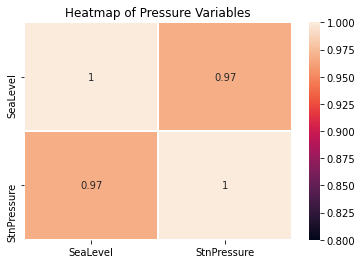

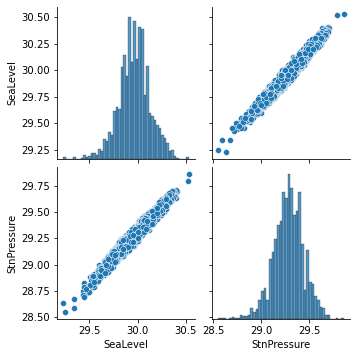

In [51]:
# Plot heatmap to compare pressure variables
ax1 = plt.axes()
sns.heatmap(
    weather[['SeaLevel','StnPressure']].corr(),
    annot=True,
    linewidth=0.5,
    vmax=1,
    vmin=0.8,
    ax=ax1
)
ax1.set_title('Heatmap of Pressure Variables')

# Plot pairplot to compare pressure variables
sns.pairplot(weather[['SeaLevel','StnPressure']]);

In [52]:
# Drop SeaLevel Pressure
weather.drop(columns='SeaLevel',axis=1, inplace=True)

### EDA on Wind

According to [study](https://underc.nd.edu/assets/216551/fullsize/mcreynolds2003.pdf)
 * Among the variables studied, the ones deemed most relevant to mosquito ability to breed and feed were temperature, wind speed, and daily rainfall.
 
**Observations**

There is a strong positive correlation between 'AvgSpeed' and 'ResultSpeed'. We will drop 'ResultSpeed' since 'AvgSpeed' is a more simple representation of wind speed.

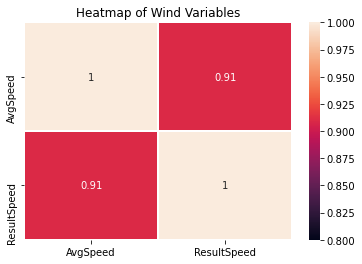

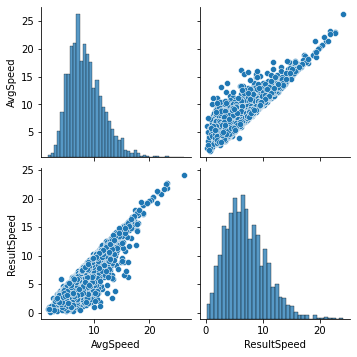

In [53]:
# Plot heatmap to compare wind variables
ax1 = plt.axes()
sns.heatmap(
    weather[['AvgSpeed','ResultSpeed']].corr(),
    annot=True,
    linewidth=0.5,
    vmax=1,
    vmin=0.8,
    ax=ax1
)
ax1.set_title('Heatmap of Wind Variables')

# Plot pairplot to compare wind variables
sns.pairplot(weather[['AvgSpeed','ResultSpeed']]);

Correlation between AvgSpeed and ResultSpeed is highly correlated at 0.91.
 
We will use AvgSpeed as a measure of wind speed and drop ResultSpeed

In [54]:
# Drop ResultSpeed and ResultDir
weather.drop(columns=['ResultSpeed'], axis=1, inplace=True)

### EDA for each variable

**Observation**

To identify whether each feature would be a meaningful predictor of WNV, we evaluated the distribution of the data per feature. Again, there is no variability in the 'Snow' feature (engineered from the 'Code Sum' section) as all of these are zero values. We will drop the 'Snow' feature.

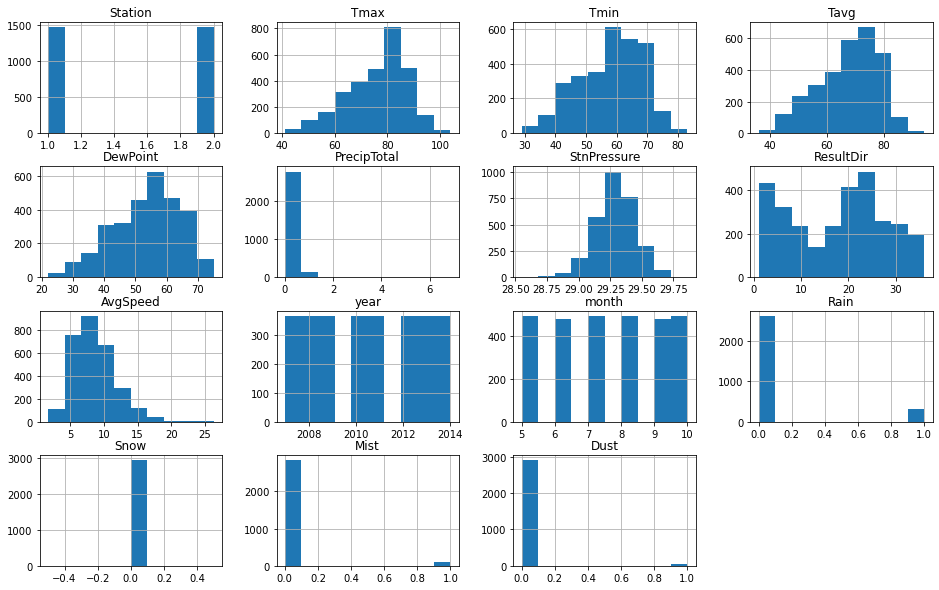

In [55]:
weather.hist(figsize=(16,10));

In [56]:
weather['Snow'].value_counts()

0    2944
Name: Snow, dtype: int64

No variation in Snow feature, hence we'll drop it

In [57]:
weather.drop(columns='Snow',axis=1,inplace=True)

### EDA on Stations

**Observations**

We segmented a few feature EDA by station to see if there are any discernible differences in data between the two stations. 

In general, the weather data appear broadly similar across both stations. 
- Station 1 have a slightly higher number of rainy days and more days with heavier rain ('PrecipTotal' measured in inches). 
- Station 2 have a slightly higher median station pressure since it is located at a lower sea level that Station 1.

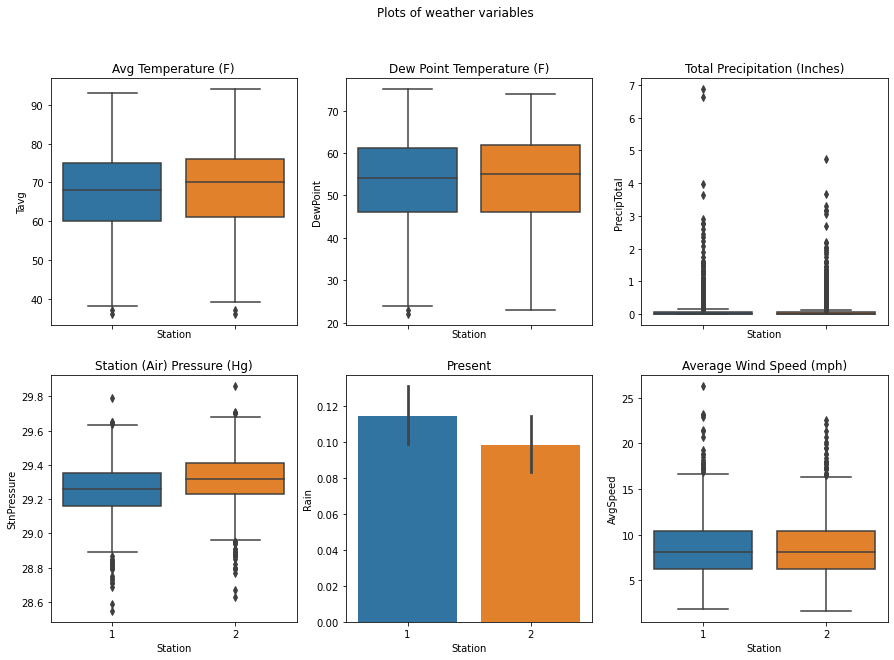

In [59]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(15,10))
fig.suptitle('Plots of weather variables')

axes[0,0].set_title('Avg Temperature (F)')
sns.boxplot(y="Tavg", x="Station", data=weather, ax=axes[0,0])

axes[0,1].set_title('Dew Point Temperature (F)')
sns.boxplot(y="DewPoint", x="Station", data=weather, ax=axes[0,1])

axes[0,2].set_title('Total Precipitation (Inches)')
sns.boxplot(y="PrecipTotal", x="Station", data=weather, ax=axes[0,2])

axes[1,0].set_title('Station (Air) Pressure (Hg)')
sns.boxplot(y="StnPressure", x="Station", data=weather, ax=axes[1,0])

axes[1,1].set_title('Present')
sns.barplot(y="Rain", x="Station", data=weather, ax=axes[1,1])

axes[1,2].set_title('Average Wind Speed (mph)')
sns.boxplot(y="AvgSpeed", x="Station", data=weather, ax=axes[1,2]);

In [60]:
weather.head(20)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,StnPressure,ResultDir,AvgSpeed,year,month,Rain,Mist,Dust
0,1,2007-05-01,83,50,67,51,0.00,29.10,27,9.2,2007,5,0,0,0
1,2,2007-05-01,84,52,68,51,0.00,29.18,25,9.6,2007,5,0,0,0
2,1,2007-05-02,59,42,51,42,0.00,29.38,4,13.4,2007,5,0,1,0
3,2,2007-05-02,60,43,52,42,0.00,29.44,2,13.4,2007,5,0,0,0
4,1,2007-05-03,66,46,56,40,0.00,29.39,7,11.9,2007,5,0,0,0
5,2,2007-05-03,67,48,58,40,0.00,29.46,6,13.2,2007,5,0,0,1
6,1,2007-05-04,66,49,58,41,0.00,29.31,8,10.8,2007,5,1,0,0
7,2,2007-05-04,78,51,64,42,0.00,29.36,7,10.4,2007,5,0,0,0
8,1,2007-05-05,66,53,60,38,0.00,29.40,7,12.0,2007,5,0,0,0
9,2,2007-05-05,66,54,60,39,0.00,29.46,7,11.5,2007,5,0,0,0


## Drop Tmax/Tmin or Tavg - TBC

**Observations**

Since Tavg is merely the average of Tmin and Tmax of each day, we will drop the 'Tmin' and 'Tmax' fields.

In [58]:
#weather.drop(columns='Tmax',axis=1,inplace=True)
#weather.drop(columns='Tmin',axis=1,inplace=True)